# SC1015 Mini Project

In [2]:
# Basic Libraries 
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# A. Cleaning the Data Set

In [3]:
df=pd.read_csv('anime.csv')
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

##### 1a. Dropping unwanted columns that are redundant. and Rows that contained not aired yet. 

In [5]:
### Removing unwanted columns
df = df.drop(columns = ['title_japanese','title_english','title_synonyms','image_url','background','related','opening_theme','ending_theme','aired','producer','licensor','broadcast','premiered'])

In [6]:
## Removing Rows with Status 'Not aired yet'
df = df[(df['status'] == 'Finished Airing') | (df['status'] == 'Currently Airing')]

In [7]:
## converting the duration columns to integer
def extract_minutes(duration_str):
    # Check if duration string is in expected format
    if isinstance(duration_str, str) and 'min' in duration_str:
        # Extract numeric part of duration string
        minutes_str = duration_str.split()[0]
        # Convert to integer
        minutes = int(minutes_str)
    else:
        # Return missing value if duration string is not in expected format
        minutes = None
    return minutes

# Apply the function to each value in the duration column
df['duration'] = df['duration'].apply(extract_minutes)

# Verify dtype is now int
print(df['duration'].dtype)

float64


###### 1.b Change the air_string to a integer value that returns the number of days it was aired. 

In [8]:
import re
from datetime import datetime

# Define function to extract start and end dates from aired_string column
def extract_dates(aired_str):
    # Extract start and end dates using regular expressions
    pattern = r'(\w{3}\s\d{1,2},\s\d{4})\sto\s(\w{3}\s\d{1,2},\s\d{4})'
    matches = re.findall(pattern, aired_str)
    if matches:
        start_date_str, end_date_str = matches[0]
        # Convert start and end dates to datetime objects
        start_date = datetime.strptime(start_date_str, '%b %d, %Y')
        end_date = datetime.strptime(end_date_str, '%b %d, %Y')
        # Calculate number of days between start and end dates
        days = (end_date - start_date).days
        return days
    else:
        return None

# Apply function to aired_string column
df['aired_string'] = df['aired_string'].apply(extract_dates)

In [9]:
df = df[(df['type'] == 'TV') | (df['type'] == 'Movie') | (df['type'] == 'ONA')]

In [10]:
df = df[(df['episodes'] != 0)]

In [11]:
df

,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,77.0,24.0,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,182.0,24.0,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,356.0,24.0,PG - Children,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,Original,38,Finished Airing,False,280.0,16.0,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,175.0,24.0,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,37577,Hibike! Euphonium Movie: Todoketai Melody - Ph...,Movie,Unknown,3,Finished Airing,False,NaN,4.0,PG-13 - Teens 13 or older,5.66,35,10480.0,8789,809,1,Kyoto Animation,Comedy
14446,26149,Tobiuo no Boy wa Byouki Desu,Movie,Unknown,1,Finished Airing,False,NaN,19.0,G - All Ages,6.60,5,12499.0,13793,67,0,NaN,"Fantasy, Historical, Kids"
14465,27579,Mii-chan no Tenohira,Movie,Unknown,1,Finished Airing,False,NaN,20.0,G - All Ages,6.60,5,11298.0,13318,90,0,NaN,"Historical, Drama"
14466,36640,Mashiro Witch,ONA,Game,1,Finished Airing,False,NaN,2.0,PG-13 - Teens 13 or older,4.57,7,11242.0,14464,24,0,NaN,"Game, Magic"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 0 to 14473
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      7550 non-null   int64  
 1   title         7550 non-null   object 
 2   type          7550 non-null   object 
 3   source        7550 non-null   object 
 4   episodes      7550 non-null   int64  
 5   status        7550 non-null   object 
 6   airing        7550 non-null   bool   
 7   aired_string  4301 non-null   float64
 8   duration      7244 non-null   float64
 9   rating        7550 non-null   object 
 10  score         7550 non-null   float64
 11  scored_by     7550 non-null   int64  
 12  rank          7539 non-null   float64
 13  popularity    7550 non-null   int64  
 14  members       7550 non-null   int64  
 15  favorites     7550 non-null   int64  
 16  studio        5068 non-null   object 
 17  genre         7499 non-null   object 
dtypes: bool(1), float64(4), int

##### Changing the aired string of moveis to be 1 day. It is difficult to determine how many days the movie is on air as different countries and cinemas air it for different period of time. Hence we set the data for movies aired string to be 1. 

In [13]:
## make the data for aired string for movies to be 1 day
df['aired_string'].fillna(value='1', inplace=True)

#### 1c. Checking for Duplicates in our data, Ensure no duplicates in data set. Observe there is no duplicated rows for us to remove. Cleaning is done. 

In [14]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre


# B. Classification
This section attempts to answer the question of whether it is worth watching an anime or not.
A few factors would go into finding said answer. For instance, it is likely that it is worth watching some anime if it is very popular, or if it has a very high rating.
We will use these variables to create a new column with name, `worth`. If it is worth watching, then the variable will carry `1`, otherwise, it will carry `0`.
Then, we will use some predictors to predict `worth`, like `episodes`, or `favourites`.

We now start off simple by predicting with a Decision Tree Classifier model.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 0 to 14473
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      7550 non-null   int64  
 1   title         7550 non-null   object 
 2   type          7550 non-null   object 
 3   source        7550 non-null   object 
 4   episodes      7550 non-null   int64  
 5   status        7550 non-null   object 
 6   airing        7550 non-null   bool   
 7   aired_string  7550 non-null   object 
 8   duration      7244 non-null   float64
 9   rating        7550 non-null   object 
 10  score         7550 non-null   float64
 11  scored_by     7550 non-null   int64  
 12  rank          7539 non-null   float64
 13  popularity    7550 non-null   int64  
 14  members       7550 non-null   int64  
 15  favorites     7550 non-null   int64  
 16  studio        5068 non-null   object 
 17  genre         7499 non-null   object 
dtypes: bool(1), float64(3), int

In [16]:
# Create 'worth' column, attributes: top 300 in ranking, and top 300 in
# popularity
conditions = [(df['rank'] <= 300) | (df['popularity'] <= 300),
             (df['rank'] > 300) | (df['popularity'] > 300)]
values = [1, 0]
df['worth'] = np.select(conditions, values)
df.head()

,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre,worth
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,77.0,24.0,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen",1
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,182.0,24.0,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen",0
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,356.0,24.0,PG - Children,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo",0
3,721,Princess Tutu,TV,Original,38,Finished Airing,False,280.0,16.0,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",0
4,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,175.0,24.0,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen",1


In [17]:
# Number of worthy animes vs number of not worthy animes
lenworth = len(df[df["worth"] == 1])
lennotworth = len(df[df["worth"] == 0])
print("Number of worthy animes: \t", lenworth)
print("Number of not worthy animes: \t", lennotworth)

Number of worthy animes: 	 449
Number of not worthy animes: 	 7101


## Model 1: Decision Tree Classifier

Reponse Variable: **Worth**

Predictor Features: **Favourites, Episodes**

In [18]:
# Extract response and predictors
y = pd.DataFrame(df["worth"])
x = pd.DataFrame(df[["favorites", "episodes"]])

In [19]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# check sample size
print("Train set:", y_train.shape, x_train.shape)
print("Test set:", y_test.shape, x_test.shape)

Train set: (5662, 1) (5662, 2)
Test set: (1888, 1) (1888, 2)


**Basic Exploration**

Perform basic statistical exploration and visualisation on train set.

In [20]:
# statistics for response
y_train["worth"].value_counts()

0    5335
1     327
Name: worth, dtype: int64

In [21]:
# statistics for predictors
x_train.describe()

,favorites,episodes
count,5662.000000,5662.000000
mean,599.401095,20.436595
std,3872.789168,63.155898
min,0.000000,1.000000
25%,0.000000,1.000000
50%,3.000000,12.000000
75%,68.000000,25.000000
max,106895.000000,1818.000000


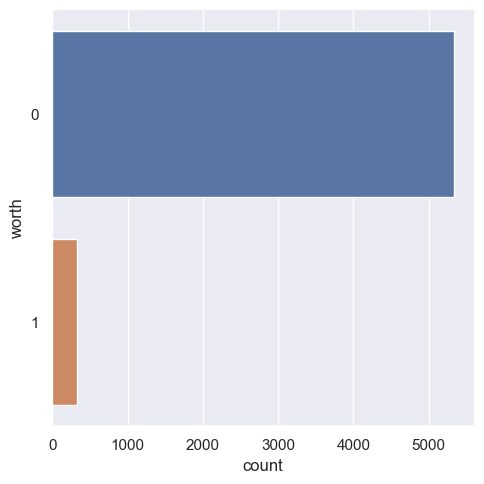

In [22]:
# distribution of response
sb.catplot(y = "worth", data = y_train, kind = "count")
plt.show()

**Classification Tree**

In [23]:
# import decisiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier

# fit decision tree using train data
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Prediction & Goodness of fit of model**

Goodness of fit of model 	Train Dataset
Classification Accuracy 	: 0.9696220416813847

Goodness of fit of model 	Test Dataset
Classification Accuracy 	: 0.965042372881356



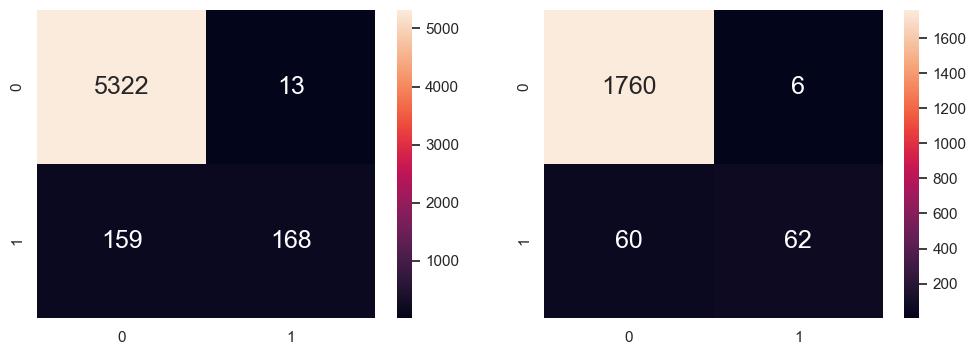

In [24]:
from sklearn.metrics import confusion_matrix

# predict response corresponding to predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# goodness of fit (on train data)
print("Goodness of fit of model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# goodness of fit (on test data)
print("Goodness of fit of model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# plot the confusion matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

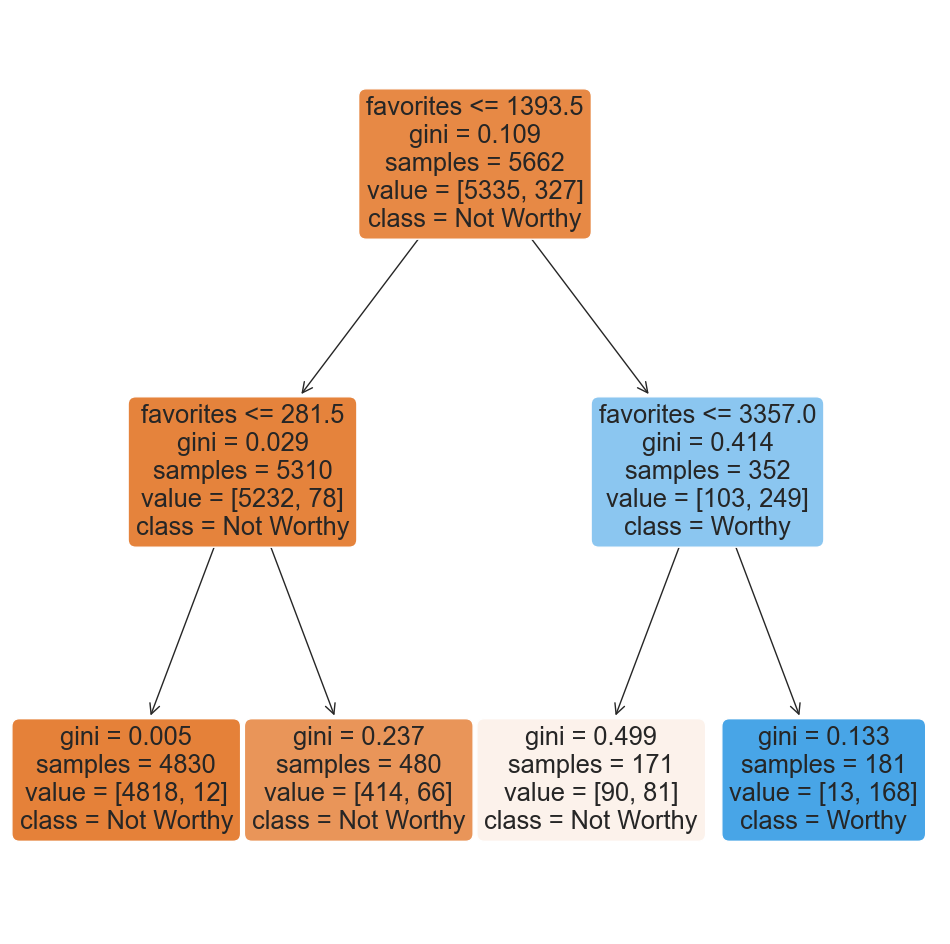

In [25]:
# plot trained decision tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
         feature_names=x_train.columns, 
          class_names=["Not Worthy","Worthy"])
plt.show()

**Conclusion/takeaways:**

Relatively high classification accuracy on both the train and test data sets.

True positive rate on train set: 192/(192+18) = 0.91429

True positive rate on test set: 57/(57+11) = 0.83824

Relatively high true positive rates on both the train and test data sets as well.

We now attempt to use another model to predict the same classifier - Random forest classifier

## Model 2: Random Forest Classifier
**Preface**

A random forest is comprised of combined decision trees. Each individual tree in the forest produces a class prediction. The class with the most votes becomes the model's overall prediction.
For example, if among 9 decision trees, 6 predict True, while the other three predict False, then the overall prediction is True.

"A large number of relatively uncorrelated trees operating as a committee will outperform any of the individual constituent models."; the low correlation between models is key. 

**Reference:**

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [26]:
# create random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# response and predictors are the same

# split up the data into a train data set and a test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
rf_model = RandomForestClassifier(n_estimators = 50, max_features = "auto")
rf_model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

Goodness of fit of model 	Train Dataset
Classification Accuracy 	: 0.9982338396326387

Goodness of fit of model 	Test Dataset
Classification Accuracy 	: 0.965572033898305



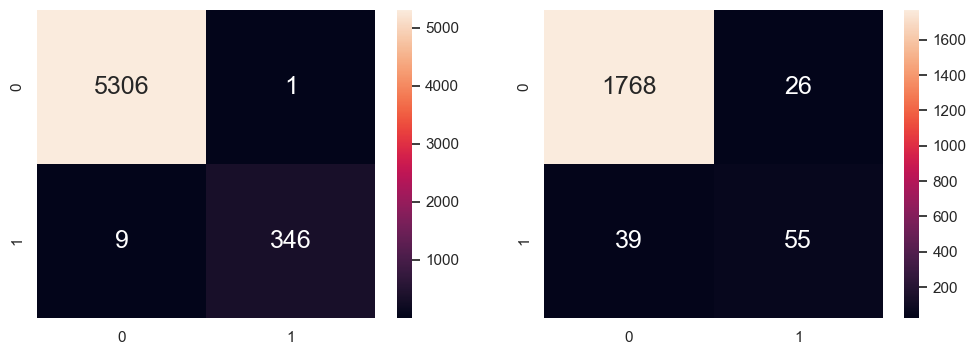

In [27]:
# predict response corresponding to predictors
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# goodness of fit on train data
print("Goodness of fit of model \tTrain Dataset")
print("Classification Accuracy \t:", rf_model.score(x_train, y_train))
print()

# goodness of fit on test data
print("Goodness of fit of model \tTest Dataset")
print("Classification Accuracy \t:", rf_model.score(x_test, y_test))
print()

# plot confusion matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

True positive rates for random forest classifier model:

True positive rates in train dataset: 0.99712

True positive rates in test dataset: 0.67901

True positive rate is a lot worse in the test dataset as compared to in the train dataset. It also follows that classification accuracy for train set is very high, but accuracy for the test set is lower.

**Comparisons between models:**

Classification accuracy of random forest model is better than classification accuracy of decision tree model in terms of performance in train data set.

However, classification accuracy of random forest model is slightly better than decision tree model in test data set. 

Therefore, we will go ahead and use the decision tree model, with its higher true positive rate on the same set. It has the better performance as compared to the random forest model as tested above.